<a href="https://colab.research.google.com/github/krishnadixit05/AI/blob/main/AI_Lab_5(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/airplane_passenger_prediction.csv')

In [ ]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df["Month"]=pd.to_datetime(df["Month"])
df.set_index("Month",inplace=True)

In [ ]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_scaled=scaler.fit_transform(df)

In [ ]:
def create_sequence(data,seq_length):
  x,y=[],[]
  for i in range(len(data)-seq_length):
    x.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(x),np.array(y)

In [ ]:
seq_length=5
X,y=create_sequence(data_scaled,seq_length)

In [ ]:
#split data into train-test split
size=int(0.8*len(X))
X_train,X_test=X[:size],X[size:]
y_train,y_test=y[:size],y[size:]

In [ ]:
#Define the LSTM model
model=Sequential([LSTM(50,return_sequences=True,input_shape=(seq_length,1)),
                  LSTM(50),Dense(1)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs=50,batch_size=16,verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0956
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0383
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0157
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0147
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0146
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0124
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0104
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0088
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0085
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0080
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━

In [ ]:
loss=model.evaluate(X_test,y_test)
print("Test Loss:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - loss: 0.0176
Test Loss: 0.017644662410020828


In [ ]:
# Make predictions
predictions = model.predict(X_test)
# Inverse transform to get actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual_values, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 4734.4862216063775


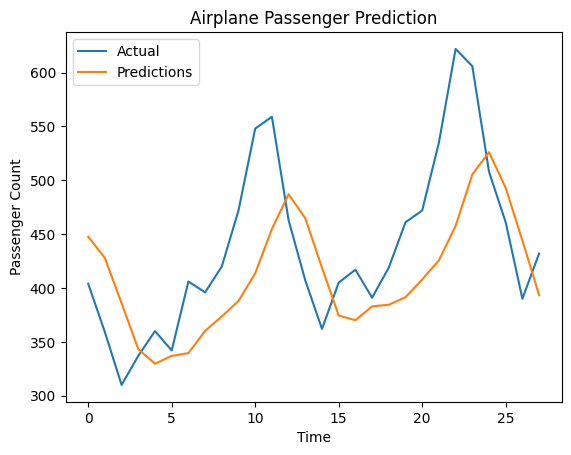

In [ ]:
# Plot the results
plt.plot(actual_values, label="Actual")
plt.plot(predictions, label="Predictions")
plt.legend()
plt.title("Airplane Passenger Prediction")
plt.xlabel("Time")
plt.ylabel("Passenger Count")
plt.show()